In [ ]:
fit legs = 신뢰도 수준 

막대그래프 선 - > 95프로 신뢰구간



## seaborn - 기본 그래프
- matplotlib을 기반으로 하는 python 데이터 시각화 라이브러리
- matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가하였음

### #01. 기본준비
#### 패키지 설치: `seaborn` 패키지의 설치가 필요하다

In [1]:
from matplotlib import pyplot as plt
from pandas import read_excel
import seaborn as sb

#### 그래프 전역 설정

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['axes.unicode_minus'] = False

### #02. 기본 그래프
###### pie그래프는 제공되지 않음

#### 1) 선그래프

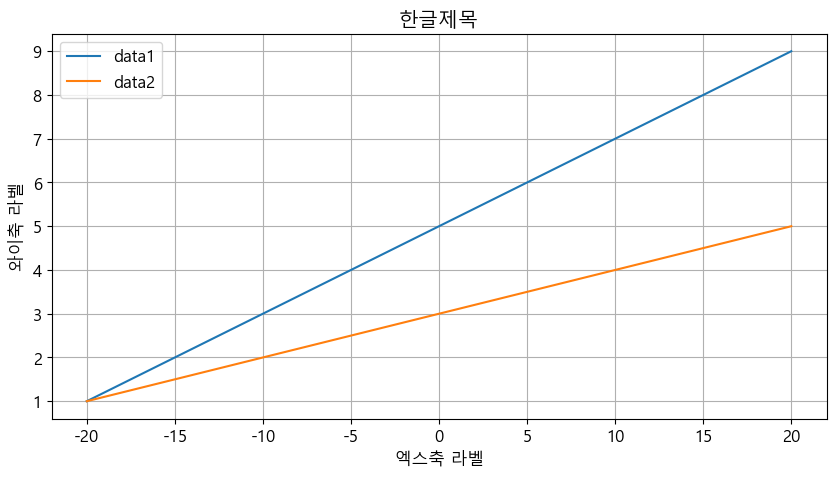

In [3]:
# 그래프 그리기(서브플룻을 사용할 경우 ax 파라미터 사용 가능)
sb.lineplot(x=[-20,-10,0,10,20], y=[1,3,5,7,9], label='data1')
sb.lineplot(x=[-20,-10,0,10,20], y=[1,2,3,4,5], label='data2')

# 그 밖의 옵션은 matplotlib과 동일
plt.title("한글제목")
plt.xlabel("엑스축 라벨")
plt.ylabel("와이축 라벨")
plt.legend()
plt.grid()
plt.show()
plt.close()

#### 2) 세로 막대 그래프

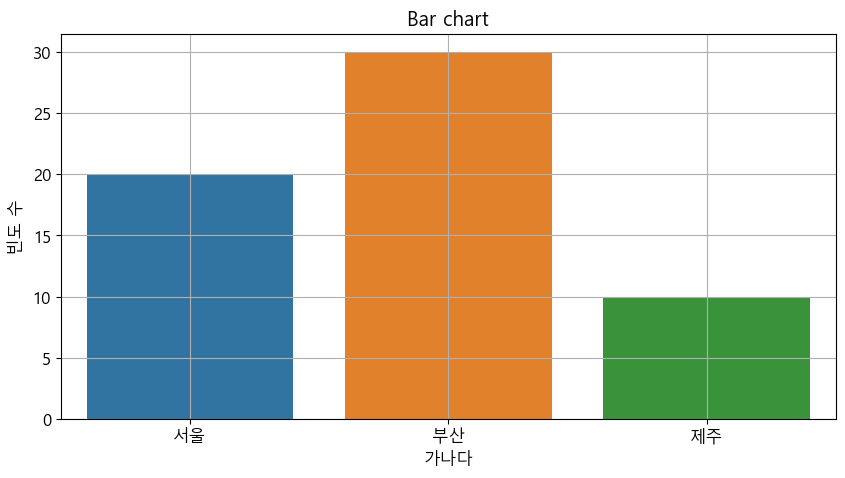

In [4]:
x = ['서울','부산','제주']
y = [20, 30, 10]

sb.barplot(x=x, y=y)

plt.title("Bar chart")
plt.xlabel("가나다")
plt.ylabel("빈도 수")
plt.grid()
plt.show()
plt.close()

#### 3) 가로 막대 그래프
###### 기본제공 팔레트
###### x축과 y축을 바꿔서 설정 
> 색상테마: deep, muted, pastel, bright, dark, colorblind, Spectral 이 있다. 

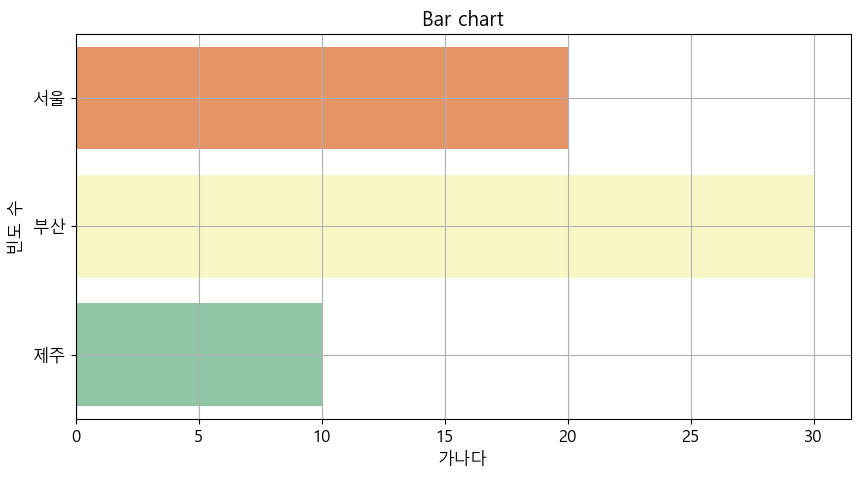

In [6]:
x = ['서울','부산','제주']
y = [20, 30, 10]

sb.barplot(x=y, y=x, label='data', palette='Spectral')

plt.title("Bar chart")
plt.xlabel("가나다")
plt.ylabel("빈도 수")
plt.grid()
plt.show()
plt.close()

#### 4) 산점도 그래프

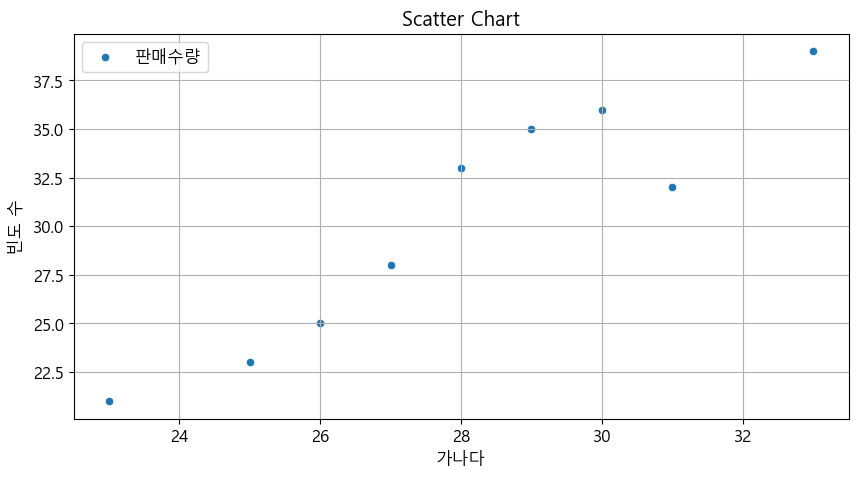

In [7]:
# 온도와 아이스크림 판매 수량
tmp = [23,25,26,27,28,29,30,31,33]
qty = [21,23,25,28,33,35,36,32,39]

sb.scatterplot(x=tmp, y=qty, label='판매수량')

plt.title("Scatter Chart")
plt. grid()
plt.xlabel('가나다')
plt.ylabel('빈도 수')
plt.show()
plt.close()

### #03. 데이터프레임을 통한 그래프

#### 1) 데이터 준비

In [8]:
df = read_excel("https://data.hossam.kr/D01/traffic_acc_year.xlsx", index_col='년도')
df

,발생건수,사망자수,부상자수
년도,,,
2005,214171,6376,342233
2006,213745,6327,340229
2007,211662,6166,335906
2008,215822,5870,338962
2009,231990,5838,361875
2010,226878,5505,352458
2011,221711,5229,341391
2012,223656,5392,344565
2013,215354,5092,328711


#### 2) 막대그래프

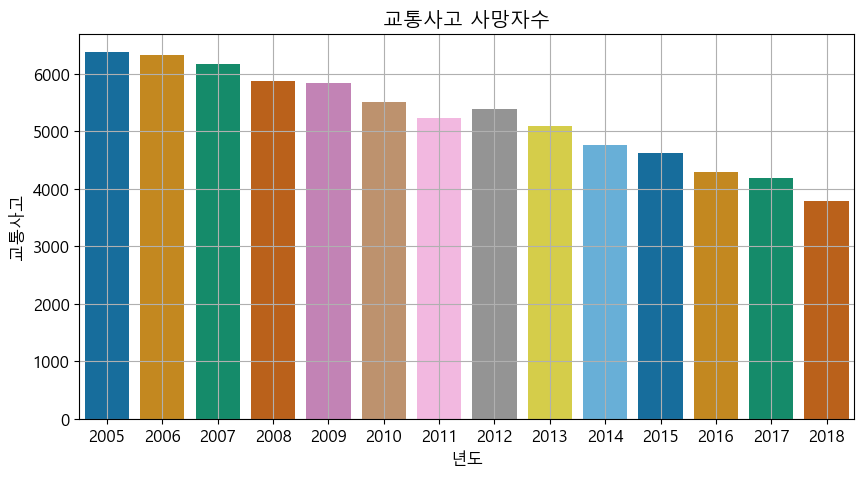

In [12]:
# 그래프 그리기(서브플롯을 사용할 경우 ax 파라미터 사용 가능)
sb.barplot(data=df, x=df.index, y='사망자수', palette='colorblind')

plt.title('교통사고 사망자수')
plt.xlabel('년도')
plt.ylabel('교통사고')
plt.grid()
plt.show()
plt.close()

#### 3) 산점도 그래프

C:\Users\한지은\AppData\Local\Temp\ipykernel_38356\3511338568.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.scatterplot(data=df, x='발생건수', y='사망자수', label='사망자수', palette='dark')


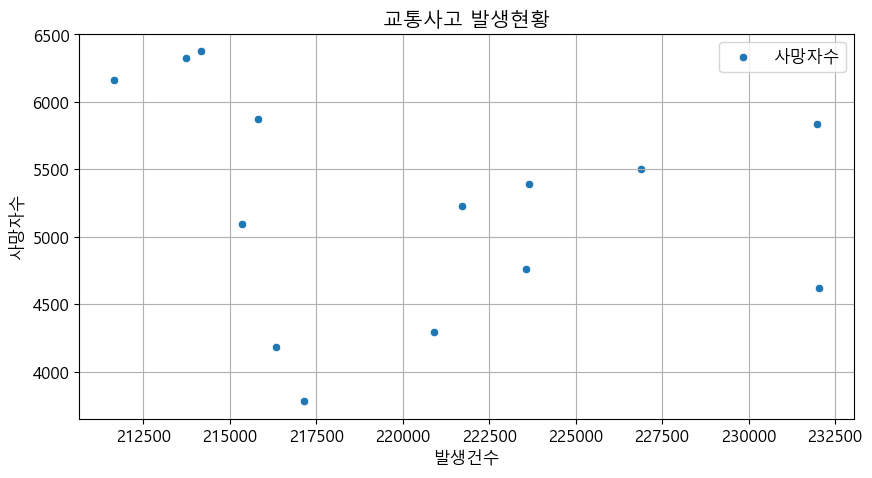

In [13]:
# 그래프 그리기(서브플롯을 사용할 경우 ax파라미터 사용가능)
sb.scatterplot(data=df, x='발생건수', y='사망자수', label='사망자수', palette='dark')

plt.xlabel("발생건수")
plt.ylabel("사망자수")
plt.title('교통사고 발생현황')
plt.grid()
plt.show()
plt.close()

#### 4) 추세선을 포함한 산점도 그래프
- 추세선 주변에 보이는 구간은 `95%` 신뢰구간임
- `fit_reg=False`를 추가하면 추세선이 표시되지 않게 되어 scatterplot메서드와 동일한 결과를 보여준다.(기본값=True)
- `ci` 파라미터는 신뢰수준을 설정하며 기본값은 `95`이다.
- `line_kws` 파라미터는 선의 색상, `scatter_kws`는 점의 색상

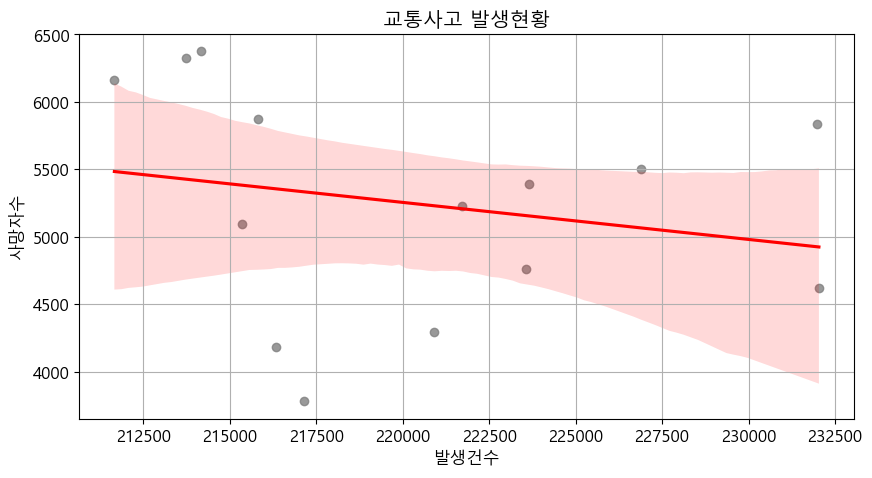

In [14]:
# 추세선을 함께 보여주는 산점도 그래프 그리기
sb.regplot(data=df, x='발생건수', y='사망자수', label='사망자수',
           line_kws={'color':'red'}, scatter_kws={'color':'grey'})
plt.title('교통사고 발생현황')
plt.xlabel('발생건수')
plt.ylabel('사망자수')
plt.grid()
plt.show()
plt.close()

#### 4) 서브플롯에 기반한 선 그래프
- 서브플롯을 사용하지 않을 경우 `sb.lineplot()` 함수에서 `ax`파라미터 제거

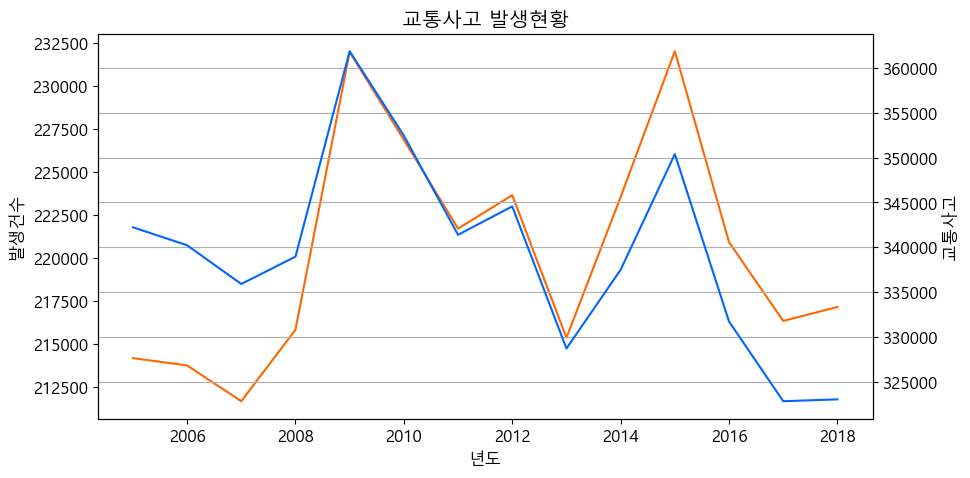

In [17]:
fig, ax1 = plt.subplots(1,1)
ax2 = ax1.twinx()

#그래프 그리기(서브플롯을 사용할 경우 ax파라미터 사용가능)
sb.lineplot(data=df, x=df.index, y='발생건수', color='#ff6600', ax=ax1)
sb.lineplot(data=df, x=df.index, y='부상자수', color='#0066ff', ax=ax2)

plt.title('교통사고 발생현황')
plt.xlabel('년도')
plt.ylabel('교통사고')
plt.grid()
plt.show()
plt.close()